# Linear Regression Using Python

Linear regression is a corner-stone of prediction and forecasting. It models a straight line using the formula: 

$$y = mx + c$$

where $y$ is the value we are trying to predict (along a straight line), $m$ is the **coefficient (A.K.A slope)** of the line, $x$ is the **independent variable** (i.e. the variable we already know) and $c$ is the **constant or intercept term**, which denotes the point along $x$ where the line intercepts $y=0$.

When performing linear regression, we are trying to find the optimal combination of $m$ and $c$ that best fits a straight line to the data we are trying to model. This is an iterative process, that is refined using a scoring mechanism. The most common type of scoring mechanism for linear regresison is called **Ordinary Least Squares**.


## 0. Prelim setup

### 0.1. Load libraries and set notebook configuration

In [64]:
from sklearn.datasets import load_diabetes
import numpy as np
import warnings
import matplotlib.pyplot as plt

# Suppress Warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### 0.2 Load example diabetes dataset from Scikit-Learn

In [65]:
# Load data
diabetes_dataset = load_diabetes()

# Load a single feature from the dataset.
X = diabetes_dataset.data[:, np.newaxis, 2]
y = diabetes_dataset.target

## 1. Using Scikit-Learn

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
# Create linear regression
regr = LinearRegression()

# Fit the line of best fit.
model = regr.fit(X, y)

In [68]:
# View the Y intercept
model.intercept_

152.1334841628967

In [69]:
# View the coefficient (one per feature)
model.coef_

array([949.43526038])

In [70]:
diabetes_y_pred = regr.predict(X)

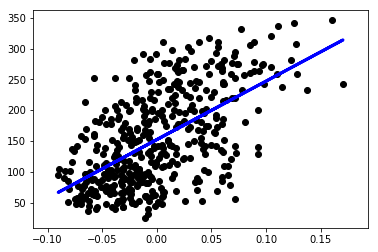

In [71]:
plt.scatter(X, y, color='black')
plt.plot(X, diabetes_y_pred, color='blue', linewidth=3)
plt.show()

## 2. Using Statsmodels

In [78]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [86]:
# By default, statsmodels does not include an intercept, therefore we need to add a new column of '1's to our dataset that the model will use as the starting intercept to then optimise.
X_fit = sm.add_constant(X)

model = sm.OLS(y, X_fit).fit()
params = model.params

In [87]:
# View the Y intercept
params[0]

152.1334841628967

In [89]:
# View the coefficient (one per feature)
params[1]

949.4352603839494

In [90]:
diabetes_y_pred = model.predict(X_fit)

In [92]:
# Retrieve our confidence interval values. - Note: this is not supported out of the box by scikit-learn.
std_err, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model, X_fit)

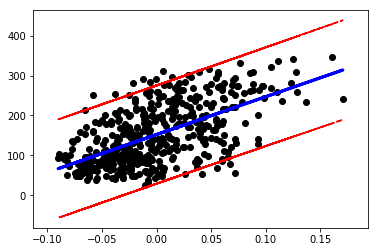

In [93]:
plt.scatter(X, y, color='black')
plt.plot(X_fit[:, 1], diabetes_y_pred, color='blue', linewidth=3)
plt.plot(X_fit[:, 1], confidence_interval_upper, 'r--')
plt.plot(X_fit[:, 1], confidence_interval_lower, 'r--')
plt.show()